# Preprocessing

In [76]:
#imports
import os
import sys 
import pandas as pd
from IPython.display import display

### Load from the dataload ipynb (alternative way that is less memory consuming)

In [77]:
#another option if you don't want to use pickles 
os.makedirs("scripts", exist_ok=True) #allows me to create folder if it is not there

# converts ipynb to py 
os.system("jupyter nbconvert --to python my_notebook.ipynb --output ./scripts/my_notebook.py")


1

In [78]:
sys.path.append("scripts")

#from dataLoader import datasets
#from dataLoader import datasets_full

### set display 

In [2]:
# set pandas display options for debugging/inspection
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

### Load Datasets from pickle

In [79]:
# define directories
DIR = os.path.join(os.getcwd(), "Data")
PICKLE_DIR = os.path.join(DIR, "Pickle")

def load_all_pickles(pickle_dir=PICKLE_DIR):
    datasets = {}
    for file in os.listdir(pickle_dir):
        if file.endswith(".pkl"):
            name = file.replace(".pkl", "")
            datasets[name] = pd.read_pickle(os.path.join(pickle_dir, file))
            print(f"Loaded {name} from {file}")
    return datasets

# load everything at once
pickleDatasets = load_all_pickles()

Loaded authors from authors.pkl
Loaded books from books.pkl
Loaded books_children from books_children.pkl
Loaded books_comics from books_comics.pkl
Loaded books_fantasy from books_fantasy.pkl
Loaded books_history from books_history.pkl
Loaded books_joined_clean from books_joined_clean.pkl
Loaded books_mystery from books_mystery.pkl
Loaded books_poetry from books_poetry.pkl
Loaded books_romance from books_romance.pkl
Loaded books_young_adult from books_young_adult.pkl
Loaded bookworks from bookworks.pkl
Loaded book_id_map from book_id_map.pkl
Loaded fuzzy_genres from fuzzy_genres.pkl
Loaded interactions_children from interactions_children.pkl
Loaded interactions_comics from interactions_comics.pkl
Loaded interactions_fantasy from interactions_fantasy.pkl
Loaded interactions_history from interactions_history.pkl
Loaded interactions_mystery from interactions_mystery.pkl
Loaded interactions_poetry from interactions_poetry.pkl
Loaded interactions_romance from interactions_romance.pkl
Loaded

In [80]:
#directory for full pickle files 
FULL_PICKLE_DIR = os.path.join(os.getcwd(), "Data", "FullyLoaded")
# load everything at once from FullyLoaded
datasets_full = load_all_pickles(FULL_PICKLE_DIR)


Loaded authors_full from authors_full.pkl
Loaded bookworks_full from bookworks_full.pkl
Loaded fuzzy_genres_full from fuzzy_genres_full.pkl
Loaded reviews_added from reviews_added.pkl
Loaded reviews_read from reviews_read.pkl
Loaded reviews_started from reviews_started.pkl
Loaded series_full from series_full.pkl
Loaded user_interaction from user_interaction.pkl


In [81]:
# paths
reviews_started_path = os.path.join(FULL_PICKLE_DIR, "reviews_started.pkl")
reviews_added_path   = os.path.join(FULL_PICKLE_DIR, "reviews_added.pkl")
reviews_read_path    = os.path.join(FULL_PICKLE_DIR, "reviews_read.pkl")

# load 
reviews_started = pd.read_pickle(reviews_started_path)
reviews_added   = pd.read_pickle(reviews_added_path)
reviews_read    = pd.read_pickle(reviews_read_path)

print("Loaded reviews_started")
print("Loaded reviews_added")
print("Loaded reviews_read")

Loaded reviews_started
Loaded reviews_added
Loaded reviews_read


In [82]:
#create dictionary specfically for the reviews datasets 
reviews_datasets = {
    "reviews_started": reviews_started,
    "reviews_added": reviews_added,
    "reviews_read": reviews_read
}

### Preview Datasets 

In [83]:
# function to have a sample preview of data to determine how to utilize them and do pre-processing 
def preview_datasets(datasets, n=3):
    """
    Loop through datasets dictionary and display each preview as a proper DataFrame in Jupyter.
    """
    for name, df in datasets.items():
        print(f"\nPreview of '{name}' dataset")
        print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
        print("Columns:", list(df.columns))
        display(df.head(n))  # dataframe not plain text
        

    print("\nPreview complete!")

In [84]:
preview_datasets(pickleDatasets, n=3)


Preview of 'authors' dataset
Shape: 100000 rows x 5 columns
Columns: ['average_rating', 'author_id', 'text_reviews_count', 'name', 'ratings_count']


,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.20,7432878,2,Davis Hewitt,20
1,3.84,2966407,81,`ly lshwk,316
2,4.22,5113888,29,Luciano Vieira Machado,407



Preview of 'books' dataset
Shape: 100000 rows x 29 columns
Columns: ['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description', 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13', 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,8,[735877],US,cze,"[{'count': '32805', 'name': 'to-read'}, {'coun...",,false,4.26,,"[1934, 2156, 15638, 53835, 77142, 5114, 116020...",Maycomb v Alabame je bezvyznamne ospale provin...,Hardcover,https://www.goodreads.com/book/show/25536116-j...,"[{'author_id': '1825', 'role': ''}, {'author_i...",Mlada fronta,280,,9788020435446,,,2015,https://www.goodreads.com/book/show/25536116-j...,https://images.gr-assets.com/books/1431593908m...,25536116,42,3275794,Jako zabít ptáčka,Jako zabít ptáčka
1,0615600808,4,[],US,eng,"[{'count': '131', 'name': 'to-read'}, {'count'...",,false,4.00,B0078GTJSS,[],"On his eighteenth birthday, Brian Hartman take...",Paperback,https://www.goodreads.com/book/show/13517228-a...,"[{'author_id': '5768481', 'role': ''}]",Pelorus Press,238,14,9780615600802,2,,2012,https://www.goodreads.com/book/show/13517228-a...,https://images.gr-assets.com/books/1331233949m...,13517228,19,19075166,Adult World,Adult World
2,0810151820,3,[],US,,"[{'count': '9', 'name': 'poetry'}, {'count': '...",,false,4.17,,[],"In lyric and narrative verse, William Olsen ex...",Paperback,https://www.goodreads.com/book/show/1426130.Av...,"[{'author_id': '426530', 'role': ''}]",Triquarterly,80,24,9780810151826,4,,2007,https://www.goodreads.com/book/show/1426130.Av...,https://images.gr-assets.com/books/1328853097m...,1426130,24,1416591,Avenue of Vanishing,Avenue of Vanishing



Preview of 'books_children' dataset
Shape: 100000 rows x 29 columns
Columns: ['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description', 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13', 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,1599150603,7,[],US,,"[{'count': '56', 'name': 'to-read'}, {'count':...",,false,4.13,B00DU10PUG,[],"Relates in vigorous prose the tale of Aeneas, ...",Paperback,https://www.goodreads.com/book/show/287141.The...,"[{'author_id': '3041852', 'role': ''}]",Yesterday's Classics,162,13,9781599150604,9,,2006,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,278578,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls
1,1934876569,6,[151854],US,,"[{'count': '515', 'name': 'to-read'}, {'count'...",,false,4.22,,"[948696, 439885, 274955, 12978730, 372986, 216...","To Kara's astonishment, she discovers that a p...",Paperback,https://www.goodreads.com/book/show/6066812-al...,"[{'author_id': '19158', 'role': ''}]",Seven Seas,216,3,9781934876565,3,,2009,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,6066812,98,701117,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...
2,0590417010,193,[],US,eng,"[{'count': '450', 'name': 'to-read'}, {'count'...",,false,4.43,B017RORXNI,"[834493, 452189, 140185, 1897316, 2189812, 424...",In Newbery Medalist Cynthia Rylant's classic b...,Hardcover,https://www.goodreads.com/book/show/89378.Dog_...,"[{'author_id': '5411', 'role': ''}]",Blue Sky Press,40,1,9780590417013,9,,1995,https://www.goodreads.com/book/show/89378.Dog_...,https://images.gr-assets.com/books/1360057676m...,89378,1331,86259,Dog Heaven,Dog Heaven



Preview of 'books_comics' dataset
Shape: 89411 rows x 29 columns
Columns: ['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description', 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13', 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,1,[],US,,"[{'count': '228', 'name': 'to-read'}, {'count'...",B00NLXQ534,true,4.12,,"[25653153, 25699172, 23530486, 12984185, 25538...",Lillian Ann Cross is forced to live the worst ...,,https://www.goodreads.com/book/show/25742454-t...,"[{'author_id': '8551671', 'role': ''}]",,,,,,,,https://www.goodreads.com/book/show/25742454-t...,https://s.gr-assets.com/assets/nophoto/book/11...,25742454,1,42749946,The Switchblade Mamma,The Switchblade Mamma
1,2205073346,2,[],US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",,false,3.94,,[],"Florence Dupre Latour raconte comment, de son ...",,https://www.goodreads.com/book/show/30128855-c...,"[{'author_id': '3274315', 'role': ''}]",Dargaud,,22,,1,,2016,https://www.goodreads.com/book/show/30128855-c...,https://images.gr-assets.com/books/1462644346m...,30128855,16,50558228,Cruelle,Cruelle
2,,5,"[246830, 362583, 362581, 623032]",US,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",,false,4.28,,"[13590139, 105963, 207585, 10503130, 4645370, ...",The questions plaguing Captain America's dream...,Hardcover,https://www.goodreads.com/book/show/13571772-c...,"[{'author_id': '37450', 'role': ''}]",Hachette Partworks Ltd.,146,,,,,2012,https://www.goodreads.com/book/show/13571772-c...,https://images.gr-assets.com/books/1333287305m...,13571772,51,102217,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...



Preview of 'books_fantasy' dataset
Shape: 100000 rows x 29 columns
Columns: ['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description', 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13', 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,6,[],US,,"[{'count': '443', 'name': 'to-read'}, {'count'...",B01380XBS6,true,3.94,B01380XBS6,"[23981536, 8715841, 18591009, 25136035, 234634...",An Omibus of Episodes 1-4 of Gildemer)\nGabrie...,,https://www.goodreads.com/book/show/26499574-v...,"[{'author_id': '7417674', 'role': ''}]",,,,,,,,https://www.goodreads.com/book/show/26499574-v...,https://s.gr-assets.com/assets/nophoto/book/11...,26499574,64,45907977,Volume One: Gildemer (The Gate Series 1 Volumes),Volume One: Gildemer (The Gate Series 1 Volumes)
1,1934876569,6,[151854],US,,"[{'count': '515', 'name': 'to-read'}, {'count'...",,false,4.22,,"[948696, 439885, 274955, 12978730, 372986, 216...","To Kara's astonishment, she discovers that a p...",Paperback,https://www.goodreads.com/book/show/6066812-al...,"[{'author_id': '19158', 'role': ''}]",Seven Seas,216,3,9781934876565,3,,2009,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,6066812,98,701117,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...
2,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,[],,,https://www.goodreads.com/book/show/33394837-t...,"[{'author_id': '242185', 'role': ''}]",,318,,,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)



Preview of 'books_history' dataset
Shape: 100000 rows x 29 columns
Columns: ['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description', 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13', 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,1599150603,7,[],US,,"[{'count': '56', 'name': 'to-read'}, {'count':...",,false,4.13,B00DU10PUG,[],"Relates in vigorous prose the tale of Aeneas, ...",Paperback,https://www.goodreads.com/book/show/287141.The...,"[{'author_id': '3041852', 'role': ''}]",Yesterday's Classics,162,13,9781599150604,9,,2006,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,278578,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls
1,0891418490,6,[],US,eng,"[{'count': '40', 'name': 'to-read'}, {'count':...",,false,4.22,B000XUAEVW,[],While the seventy-seven-day siege of Khe Sanh ...,Paperback,https://www.goodreads.com/book/show/261854.The...,"[{'author_id': '91961', 'role': ''}]",Presidio Press,384,27,9780891418498,4,,2004,https://www.goodreads.com/book/show/261854.The...,https://s.gr-assets.com/assets/nophoto/book/11...,261854,58,253812,The Hill Fights: The First Battle of Khe Sanh,The Hill Fights: The First Battle of Khe Sanh
2,037583687X,615,[],US,,"[{'count': '4248', 'name': 'to-read'}, {'count...",,false,3.98,B0010SEMV4,"[614054, 272343, 824934, 581383, 93598, 638689...",It's 1953 and 11-year-old Penny dreams of a su...,Hardcover,https://www.goodreads.com/book/show/89377.Penn...,"[{'author_id': '137561', 'role': ''}]",Random House Books for Young Readers,288,25,9780375836879,7,,2006,https://www.goodreads.com/book/show/89377.Penn...,https://images.gr-assets.com/books/1320470906m...,89377,6949,86258,Penny from Heaven,Penny from Heaven



Preview of 'books_joined_clean' dataset
Shape: 100000 rows x 24 columns
Columns: ['book_id', 'work_id', 'best_book_id', 'title', 'title_without_series', 'description', 'publication_year', 'publication_month', 'publication_day', 'average_rating', 'ratings_count', 'text_reviews_count', 'ratings_sum', 'genres', 'author_id', 'name', 'average_rating_author', 'ratings_count_author', 'text_reviews_count_author', 'series_id', 'title_series', 'description_series', 'series_works_count', 'primary_work_count']


,book_id,work_id,best_book_id,title,title_without_series,description,publication_year,publication_month,publication_day,average_rating,ratings_count,text_reviews_count,ratings_sum,genres,author_id,name,average_rating_author,ratings_count_author,text_reviews_count_author,series_id,title_series,description_series,series_works_count,primary_work_count
0,25536116,3275794,2657,Jako zabít ptáčka,Jako zabít ptáčka,Maycomb v Alabame je bezvyznamne ospale provin...,2015,,,4.26,42,8,14482268,"{'fiction': 8867, 'history, historical fiction...",1825,Harper Lee,4.21,3581022,99236,735877,To Kill a Mockingbird,,2,2
1,13517228,19075166,13517228,Adult World,Adult World,"On his eighteenth birthday, Brian Hartman take...",2012,2,14,4.00,19,4,96,{'fiction': 3},5768481,Christopher Scott Grimaldi,4.00,24,4,None,NaN,NaN,NaN,NaN
2,1426130,1416591,1426130,Avenue of Vanishing,Avenue of Vanishing,"In lyric and narrative verse, William Olsen ex...",2007,4,24,4.17,24,3,100,{'poetry': 9},426530,William Olsen,4.10,114,22,None,NaN,NaN,NaN,NaN



Preview of 'books_mystery' dataset
Shape: 100000 rows x 29 columns
Columns: ['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description', 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13', 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,3,[197940],US,nl,"[{'count': '2631', 'name': 'to-read'}, {'count...",,false,3.57,,"[11505253, 12362857, 25869649, 12017508, 17251...",Als de schilderes Eva Magnus en haar dochtertj...,Paperback,https://www.goodreads.com/book/show/29960817-e...,"[{'author_id': '163027', 'role': ''}, {'author...",Marmer,279,,9789460682865,3,,2016,https://www.goodreads.com/book/show/29960817-e...,https://images.gr-assets.com/books/1461103676m...,29960817,19,3262401,Eva's oog (Inspecteur Konrad Sejer #1),Eva's oog (Inspecteur Konrad Sejer #1)
1,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,[],,,https://www.goodreads.com/book/show/33394837-t...,"[{'author_id': '242185', 'role': ''}]",,318,,,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,,28,[497601],US,eng,"[{'count': '1615', 'name': 'to-read'}, {'count...",B006E8ZYPI,true,3.83,B006E8ZYPI,"[10094967, 13243487, 13557694, 9421900, 219354...","The first body is in Singapore, on a bed in an...",Kindle Edition,https://www.goodreads.com/book/show/15702824-t...,"[{'author_id': '263795', 'role': ''}]",,262,,,,,,https://www.goodreads.com/book/show/15702824-t...,https://images.gr-assets.com/books/1339575138m...,15702824,488,1998311,The Ambassador's Wife (Inspector Samuel Tay #1),The Ambassador's Wife (Inspector Samuel Tay #1)



Preview of 'books_poetry' dataset
Shape: 36514 rows x 29 columns
Columns: ['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description', 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13', 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,1,[],US,eng,"[{'count': '8', 'name': 'to-read'}, {'count': ...",,false,3.83,,[],Number 30 in a series of literary pamphlets pu...,Paperback,https://www.goodreads.com/book/show/16037549-v...,"[{'author_id': '15585', 'role': ''}]","Houghton, Mifflin and Company",80,1,,11,,1887,https://www.goodreads.com/book/show/16037549-v...,https://images.gr-assets.com/books/1348176637m...,16037549,3,5212748,Vision of Sir Launfal and Other Poems,Vision of Sir Launfal and Other Poems
1,0811223981,2,[],US,,"[{'count': '100', 'name': 'to-read'}, {'count'...",,false,3.83,B00U2WY9U8,[],Fairy Tales gathers the unconventional verse d...,Paperback,https://www.goodreads.com/book/show/22466716-f...,"[{'author_id': '16073', 'role': ''}, {'author_...",New Directions,128,20,9780811223980,4,,2015,https://www.goodreads.com/book/show/22466716-f...,https://images.gr-assets.com/books/1404958407m...,22466716,37,41905435,Fairy Tales: Dramolettes,Fairy Tales: Dramolettes
2,0374428115,7,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,4.38,,[],Three poems describe the nighttime adventures ...,Paperback,https://www.goodreads.com/book/show/926662.Gro...,"[{'author_id': '18540', 'role': ''}, {'author_...",Farrar Straus Giroux,,12,9780374428112,7,,2008,https://www.goodreads.com/book/show/926662.Gro...,https://s.gr-assets.com/assets/nophoto/book/11...,926662,45,911665,Growltiger's Last Stand and Other Poems,Growltiger's Last Stand and Other Poems



Preview of 'books_romance' dataset
Shape: 100000 rows x 29 columns
Columns: ['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description', 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13', 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0060565071,178,[],US,en-US,"[{'count': '2337', 'name': 'to-read'}, {'count...",,false,3.87,B000PDZG0Q,"[501804, 767737, 992206, 4701987, 2484425, 781...","The perfect summer story of a girl, several bo...",Paperback,https://www.goodreads.com/book/show/171008.Car...,"[{'author_id': '99642', 'role': ''}]",HarperTeen,336,27,9780060565077,4,,2004,https://www.goodreads.com/book/show/171008.Car...,https://s.gr-assets.com/assets/nophoto/book/11...,171008,4618,165129,Caribbean Cruising,Caribbean Cruising
1,,21,[811663],US,en-US,"[{'count': '598', 'name': 'to-read'}, {'count'...",B01BLJGA9S,true,4.23,B01BLJGA9S,"[25515353, 20483269, 25650829, 18913492, 22578...",,,https://www.goodreads.com/book/show/29074693-p...,"[{'author_id': '5360266', 'role': ''}]",,,,,,,,https://www.goodreads.com/book/show/29074693-p...,https://s.gr-assets.com/assets/nophoto/book/11...,29074693,149,46079519,"Prowled Darkness (Dante's Circle, #7)","Prowled Darkness (Dante's Circle, #7)"
2,,3,[513301],US,en-GB,"[{'count': '44', 'name': 'to-read'}, {'count':...",B007ZUTVIA,true,3.59,,[],Explicit Adult Content! The 76 page conclusion...,Kindle Edition,https://www.goodreads.com/book/show/15835325-c...,"[{'author_id': '151017', 'role': ''}]",Yaoi Press,67,12,,10,,2012,https://www.goodreads.com/book/show/15835325-c...,https://images.gr-assets.com/books/1371127174m...,15835325,49,21572713,"Class Mate - Conclusion (Class Mate, #2)","Class Mate - Conclusion (Class Mate, #2)"



Preview of 'books_young_adult' dataset
Shape: 93398 rows x 29 columns
Columns: ['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description', 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13', 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,1,[147734],US,,"[{'count': '1057', 'name': 'to-read'}, {'count...",B0056A00P4,true,4.04,B0056A00P4,"[519546, 1295074, 21407416]",This is the final tale in the bestselling auth...,,https://www.goodreads.com/book/show/12182387-t...,"[{'author_id': '50873', 'role': ''}, {'author_...",,,,,,,,https://www.goodreads.com/book/show/12182387-t...,https://s.gr-assets.com/assets/nophoto/book/11...,12182387,4,285263,"The Passion (Dark Visions, #3)","The Passion (Dark Visions, #3)"
1,,2,[425995],US,,"[{'count': '1010', 'name': 'to-read'}, {'count...",B006KLYIAG,true,3.80,B006KLYIAG,"[13400912, 13327517, 18107102, 15797097, 11472...",Life should be simple for Cassie.\nFor the sma...,,https://www.goodreads.com/book/show/20135365-h...,"[{'author_id': '5395324', 'role': ''}]",,,,,,,,https://www.goodreads.com/book/show/20135365-h...,https://s.gr-assets.com/assets/nophoto/book/11...,20135365,5,18450480,Hope's Daughter,Hope's Daughter
2,0698143760,17,[493993],US,,"[{'count': '1799', 'name': 'fantasy'}, {'count...",,true,3.80,,"[15728807, 17182499, 15673520, 16081758, 17842...",Wanted by no one.\nHunted by everyone.\nSixtee...,ebook,https://www.goodreads.com/book/show/21401181-h...,"[{'author_id': '7314532', 'role': ''}]",Viking Children's,416,4,9780698143760,3,,2014,https://www.goodreads.com/book/show/21401181-h...,https://images.gr-assets.com/books/1394747643m...,21401181,33,24802827,"Half Bad (Half Life, #1)","Half Bad (Half Life, #1)"



Preview of 'bookworks' dataset
Shape: 100000 rows x 16 columns
Columns: ['books_count', 'reviews_count', 'original_publication_month', 'default_description_language_code', 'text_reviews_count', 'best_book_id', 'original_publication_year', 'original_title', 'rating_dist', 'default_chaptering_book_id', 'original_publication_day', 'original_language_id', 'ratings_count', 'media_type', 'ratings_sum', 'work_id']


,books_count,reviews_count,original_publication_month,default_description_language_code,text_reviews_count,best_book_id,original_publication_year,original_title,rating_dist,default_chaptering_book_id,original_publication_day,original_language_id,ratings_count,media_type,ratings_sum,work_id
0,5,66,,,10,29870175,,,5:15|4:8|3:8|2:1|1:2|total:34,,,,34,book,135,50240162
1,1,35,,,3,282125,1997,A Force upon the Plain: The American Militia M...,5:4|4:5|3:4|2:3|1:1|total:17,,,,17,,59,273679
2,2,268,,,7,7327624,1987,,5:49|4:58|3:26|2:5|1:3|total:141,,,,141,book,568,8948723



Preview of 'book_id_map' dataset
Shape: 2360650 rows x 2 columns
Columns: ['book_id_csv', 'book_id']


,book_id_csv,book_id
0,0,34684622
1,1,34536488
2,2,34017076



Preview of 'fuzzy_genres' dataset
Shape: 100000 rows x 2 columns
Columns: ['book_id', 'genres']


,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,18080740,{}
2,10293807,"{'romance': 21, 'fiction': 1}"



Preview of 'interactions_children' dataset
Shape: 100000 rows x 10 columns
Columns: ['user_id', 'book_id', 'review_id', 'is_read', 'rating', 'review_text_incomplete', 'date_added', 'date_updated', 'read_at', 'started_at']


,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,fe4e9a4fe72a20deab393a9901cdd419,641991,453adf7fb5314801d1d497fe3e50b933,True,4,,Mon Oct 22 18:34:21 -0700 2007,Mon Oct 22 18:34:21 -0700 2007,,
1,a0c5c943a45ce1af9b260228876b48ff,17986452,7157e21341e5470b87849e61b921a5d9,True,5,Is there ever any way to fully thank our mothe...,Wed Jan 22 09:32:51 -0800 2014,Wed Jan 22 15:11:29 -0800 2014,Wed Jan 22 15:11:29 -0800 2014,
2,e0ab80f9c6ce204d4e81eff7b31c24f4,244422,d6f7574ebda01c9595486646604531e2,True,5,,Sun Oct 23 11:32:35 -0700 2011,Sun Oct 23 11:32:35 -0700 2011,,



Preview of 'interactions_comics' dataset
Shape: 100000 rows x 10 columns
Columns: ['user_id', 'book_id', 'review_id', 'is_read', 'rating', 'review_text_incomplete', 'date_added', 'date_updated', 'read_at', 'started_at']


,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,a3c4995d70c1ea2000da803390554e09,17571405,b6150134b4560911476243a5794ca5d8,False,0,,Fri Mar 03 05:34:16 -0800 2017,Fri Mar 03 05:34:17 -0800 2017,,
1,cec5ef3793e0169a7bf48e704bfd6a87,6325689,8a22a1b956313083ed0f5ca73990fa77,False,0,,Tue Jul 03 06:51:10 -0700 2012,Tue Jul 03 06:51:10 -0700 2012,,
2,c6665af954393a3678917ffb85bf4e2d,8890606,f9ea0cf18ccd7b2f8d0af2963d4704d4,False,0,,Fri Dec 30 10:21:42 -0800 2016,Fri Dec 30 10:21:42 -0800 2016,,



Preview of 'interactions_fantasy' dataset
Shape: 100000 rows x 10 columns
Columns: ['user_id', 'book_id', 'review_id', 'is_read', 'rating', 'review_text_incomplete', 'date_added', 'date_updated', 'read_at', 'started_at']


,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,acf1e62098a7e43149c7a7b3fe041acd,1215032,16cf0ce110af3512d472c67349d3535c,False,0,,Fri Jan 25 10:22:29 -0800 2013,Fri Jan 25 10:22:29 -0800 2013,,
1,cb60311545adb036ff064a00bdfd8e14,4214,692e613bef0edc701c95988d254ef61b,False,0,,Fri Jan 21 22:30:21 -0800 2011,Fri Jan 21 22:30:21 -0800 2011,,
2,0a9ef615e76c6353f894af4ee3b0cd4c,170453,3c35b9f21108511ce225b56dd51f8561,True,4,Bravo,Mon Feb 04 02:07:33 -0800 2013,Sat Jun 06 06:49:12 -0700 2015,Thu Jan 01 00:00:00 -0800 2009,



Preview of 'interactions_history' dataset
Shape: 100000 rows x 10 columns
Columns: ['user_id', 'book_id', 'review_id', 'is_read', 'rating', 'review_text_incomplete', 'date_added', 'date_updated', 'read_at', 'started_at']


,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,2919639c3dd04c58923d9e65504c3d0c,21535268,5c37c505a9fc48cff7b0eee27f53a340,False,0,,Mon May 25 09:50:09 -0700 2015,Mon May 25 09:50:09 -0700 2015,,
1,089c3adb72b25c2821a2d98b273a75aa,25387538,9d567a1b65c58eec9708297549cc9113,False,0,,Sun Apr 26 10:23:44 -0700 2015,Sun Apr 26 10:23:44 -0700 2015,,
2,7acd518e2752bb22654e2f99a5e44797,28449257,0cbd6fd64a98d637facd553dba6cf792,False,0,,Tue Nov 15 05:31:53 -0800 2016,Tue Nov 15 05:31:53 -0800 2016,,



Preview of 'interactions_mystery' dataset
Shape: 100000 rows x 10 columns
Columns: ['user_id', 'book_id', 'review_id', 'is_read', 'rating', 'review_text_incomplete', 'date_added', 'date_updated', 'read_at', 'started_at']


,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,23b2741d93d6f29a443c3bf959099076,16343,0ddb5c4ff5cd027f670da3e764b7161a,True,5,,Sun Apr 29 06:55:00 -0700 2012,Sun Apr 29 06:55:00 -0700 2012,,
1,681281e9ed8cb220574636bff61581c5,66559,812b8228919316b5866a8db269cda9bd,True,3,,Wed Apr 16 07:14:27 -0700 2014,Wed Apr 30 07:40:01 -0700 2014,Wed Apr 30 07:40:01 -0700 2014,Wed Apr 16 07:14:27 -0700 2014
2,17b2de25c727f48a5d5a076cd240cb48,32720090,5e0d9aafa09958f3d9a2a97ecb64832a,False,0,,Thu Feb 23 05:26:42 -0800 2017,Thu Feb 23 05:26:42 -0800 2017,,



Preview of 'interactions_poetry' dataset
Shape: 100000 rows x 10 columns
Columns: ['user_id', 'book_id', 'review_id', 'is_read', 'rating', 'review_text_incomplete', 'date_added', 'date_updated', 'read_at', 'started_at']


,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,ceb8288a28d63e349af7f57df729780b,5868006,03ade404d66204594e955ecac9150736,False,0,,Sat Aug 09 08:25:33 -0700 2014,Sat Aug 09 08:25:33 -0700 2014,,
1,1e8ccf1861f820a2fc640de6a350be88,17996971,f07f49ab83b83449b3132409ef9618c4,True,3,,Thu May 04 08:42:34 -0700 2017,Thu May 04 08:42:38 -0700 2017,,
2,8842281e1d1347389f2ab93d60773d4d,30119,787564bef16cb1f43e0f641ab59d25b7,True,5,,Sat Jan 13 13:44:20 -0800 2007,Wed Mar 22 11:45:08 -0700 2017,Tue Mar 01 00:00:00 -0800 1983,



Preview of 'interactions_romance' dataset
Shape: 100000 rows x 10 columns
Columns: ['user_id', 'book_id', 'review_id', 'is_read', 'rating', 'review_text_incomplete', 'date_added', 'date_updated', 'read_at', 'started_at']


,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,b8fecd5b4406805cb2cbcb80843c64a7,17314430,81c699a1309df00545e8e292e45a937e,False,0,,Wed Apr 20 02:47:09 -0700 2016,Wed Apr 20 02:47:12 -0700 2016,,
1,1cee98105eba4588097b109e373557c4,6439475,d803d4f04ccdbba45efb568d77c2861d,False,0,,Fri Aug 24 08:36:05 -0700 2012,Fri Aug 24 08:36:05 -0700 2012,,
2,f90925cb7cc5f96712fa4e6e0c25d8c0,122728,df463c4dd4b11f18b3c65dd878741106,False,0,,Tue Aug 06 07:08:13 -0700 2013,Tue Oct 21 12:26:55 -0700 2014,,



Preview of 'interactions_young_adult' dataset
Shape: 100000 rows x 10 columns
Columns: ['user_id', 'book_id', 'review_id', 'is_read', 'rating', 'review_text_incomplete', 'date_added', 'date_updated', 'read_at', 'started_at']


,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,0a72fc5d18d9fcd96a0601ee118022df,41865,079278ede924cf69b2c7ab6a16740c8b,True,2,,Wed May 12 13:38:18 -0700 2010,Wed May 12 13:38:18 -0700 2010,,
1,c79acfc9d082fbda376b186f80888b0c,8490112,a894aacf8d9650da683211671012912d,False,0,,Mon Jul 04 10:20:20 -0700 2016,Mon Jul 04 10:20:21 -0700 2016,,
2,f3e8dddb503b4f1d83a6794d69c71a43,9828218,d99658817465df1b9e8b4fecbc112642,True,5,,Mon Oct 22 15:21:52 -0700 2012,Fri Mar 17 01:31:33 -0700 2017,,



Preview of 'reviews' dataset
Shape: 100000 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,dd8d6077f5e48b68327c1cac9d16f3e3,29960675,765130acfe5979e5d960728d2a3ec898,4,"Thank you to Linsey Miller, Sourcebooks, and N...",Mon Jul 03 06:11:47 -0700 2017,Wed Aug 09 12:57:12 -0700 2017,,,1,0
1,071222e19ae29dc9fdbe225d983449be,63432,1b4206a440b54f03b830d3d859f775cf,2,"Nah, this particular volume has nothing to do ...",Mon Apr 16 01:24:18 -0700 2012,Mon Apr 16 01:26:57 -0700 2012,Tue Jun 30 00:00:00 -0700 1998,,0,0
2,8cbd2c89aa007bc2a0275c0b11a66bed,835817,f77ebeaa7c6a7fb85c59a73c118a09d3,5,"?Puedo darle 50 estrellas? ?Puedo, por favor? ...",Wed Aug 17 15:57:26 -0700 2016,Fri Sep 02 17:54:46 -0700 2016,Fri Sep 02 00:00:00 -0700 2016,Wed Aug 17 00:00:00 -0700 2016,3,0



Preview of 'reviews_children' dataset
Shape: 100000 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,7d11a9c676ed0cbf847e54821502b487,28260434,367a8e91fc996c681f087147b5951f80,0,I received a copy of this book from Bloomsbury...,Thu Jul 14 04:02:47 -0700 2016,Thu Oct 05 15:40:07 -0700 2017,,,0,0
1,8842281e1d1347389f2ab93d60773d4d,17290220,22d424a2b0057b18fb6ecf017af7be92,5,One of my favorite books to read to my 5 year ...,Sat Nov 08 08:54:03 -0800 2014,Wed Jan 25 13:56:12 -0800 2017,Tue Jan 24 00:00:00 -0800 2017,,4,0
2,5726b0f4a37fbea9ed199e1d8345aa12,650193,a7b0194e92b74daf7a0ec2fb9020daac,3,This book is by far not my favorite potty trai...,Fri Dec 05 08:46:38 -0800 2008,Fri Dec 05 08:48:41 -0800 2008,,,0,0



Preview of 'reviews_comics' dataset
Shape: 100000 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,3579d381434c0c1cc7af5f48b2872165,15808817,82d0dff06f53c607153a398cf424c0af,5,This wasn't at all how i pictured the characte...,Sun Mar 08 13:02:07 -0700 2015,Sat Jun 06 05:33:38 -0700 2015,Sun Mar 08 14:29:50 -0700 2015,,0,0
1,bafc2d50014200cda7cb2b6acd60cd73,6315584,72f1229aba5a88f9e72f0dcdc007dd22,4,"I've never really liked Spider-Man. I am, howe...",Wed Aug 10 06:06:48 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,Wed Aug 10 00:00:00 -0700 2016,0,0
2,5587ae8871db74f5c9f608e83dd05221,34385259,5302a16c57386b92d430a16bbfa8fd33,4,"prthm kyyekdin shudhui nerrechi-cerrechi, bhul...",Wed Mar 01 21:41:14 -0800 2017,Tue Apr 11 23:20:51 -0700 2017,,,14,2



Preview of 'reviews_fantasy' dataset
Shape: 100000 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,07bfd77d97c2f2c273c1c0da58bff464,23308087,a0226419dfa56a54f1f2c99951596210,5,Renee Ahdieh continues to blow me away with he...,Sun Nov 06 19:48:29 -0800 2016,Sun Jul 23 16:27:34 -0700 2017,Sun Jul 23 16:27:34 -0700 2017,Sun Jul 23 00:00:00 -0700 2017,1,0
1,ab1663665b29eb61c9dda0e5697bfbe6,21100112,ca05bab8bdbea9ee4799b1caba2373b7,4,** spoiler alert ** \n I did love this book - ...,Sun Jan 08 05:15:45 -0800 2017,Tue Jan 10 02:30:43 -0800 2017,Mon Jan 09 00:00:00 -0800 2017,Sat Jan 07 00:00:00 -0800 2017,0,0
2,6e58a5249317da1274e82a6f97822f13,20454095,7c48bda2ab1071a1220b85ee7a2beaaf,3,For those who have enjoyed the tales of Max-Er...,Sat Aug 23 10:32:50 -0700 2014,Thu Sep 11 14:27:55 -0700 2014,Thu Sep 11 14:27:55 -0700 2014,Sat Aug 23 00:00:00 -0700 2014,0,0



Preview of 'reviews_history' dataset
Shape: 100000 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,6308463967d81025671fa8513ec71932,14290922,ce94836e49930d9f6cc7438e6c796e67,0,Just $2.99 right now,Thu May 24 18:17:24 -0700 2012,Wed Dec 24 13:54:48 -0800 2014,,,0,0
1,4829ef355adfbd819d069439881c7bcf,24515550,8749ccc2887fe97dfd9a91d75d3cd7e0,3,"It was cute, but not great. The hero and heroi...",Fri Nov 04 00:03:00 -0700 2016,Fri Nov 04 00:05:18 -0700 2016,Fri Nov 04 00:05:18 -0700 2016,,0,0
2,0414942843c4940f0613fbe44b7939d3,24495,1ac558572384a7b156d3f45ae689242f,2,I read this because I was going to see Justice...,Sat Jan 17 08:13:44 -0800 2015,Sat Jan 17 08:19:13 -0800 2015,Tue Jan 13 00:00:00 -0800 2015,,0,0



Preview of 'reviews_mystery' dataset
Shape: 100000 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,4eb8fe6860bc393760ed1274082fd7ec,26154406,ecc0441ee44c7ec4ba1b89c5bb15d8c4,4,"i enjoyed this read, excellent and fast paced ...",Sun Feb 28 10:13:38 -0800 2016,Sun Mar 27 08:06:22 -0700 2016,Sun Mar 27 08:06:22 -0700 2016,Tue Mar 15 00:00:00 -0700 2016,0,0
1,4872c16f2fb2ec7c27e4cfa9abc373e5,19572039,cf69944d2846302765772475c840f02a,5,"O minulem dile jsem psal, ze uz neni nutno cis...",Sat Dec 21 07:56:30 -0800 2013,Mon Dec 30 05:26:16 -0800 2013,Sun Dec 29 00:00:00 -0800 2013,Sat Dec 21 00:00:00 -0800 2013,0,0
2,93d385825a03ec70276af08fe04333fd,13550608,28ec749b33a9de134c07b388bf66ab7d,4,Got it on the Kindle Daily Deal for 99 cents. ...,Thu Apr 19 14:00:34 -0700 2012,Fri Apr 20 22:21:49 -0700 2012,Sat Apr 21 22:21:49 -0700 2012,Thu Apr 19 00:00:00 -0700 2012,0,0



Preview of 'reviews_poetry' dataset
Shape: 100000 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,3ca7375dba942a760e53b726c472a7dd,402128,28423ff309bc896c071a8d9df4a10e8a,5,I have three younger siblings and we grew up w...,Tue Jun 12 08:59:04 -0700 2012,Fri Jun 15 11:41:12 -0700 2012,,,0,0
1,0ef32090550901ead25cb0ea21c4d36b,92270,2db1180992e2b0b1631a3ac5644bde84,5,This is my favorite collection of poetry.,Mon Apr 14 18:42:40 -0700 2014,Mon Apr 14 18:43:05 -0700 2014,Wed Jan 01 00:00:00 -0800 1997,,0,0
2,362dd63076d21612a07fbd983c243f84,14553840,3f09571b9dfb8a63bfe307707775f213,4,Hillarious! I enjoyed reading the poem out lou...,Sat Nov 10 03:28:21 -0800 2012,Sat Nov 10 03:31:04 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,,0,0



Preview of 'reviews_romance' dataset
Shape: 100000 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,2c278d47a1b44aca4e9f391813f0e09d,31417121,d5905df82a6030a7989aa473cf929de4,4,Typical heart lifting read from this author,Tue Oct 24 00:12:46 -0700 2017,Tue Oct 24 04:36:20 -0700 2017,Sun Oct 22 00:00:00 -0700 2017,,0,0
1,eb105d896ac3c8bb9774043de89cd759,16158519,409c714b2bee9730d7027699d626fb8f,3,This book was both a mystery and a romance. La...,Tue Nov 19 06:42:29 -0800 2013,Tue Nov 19 06:50:55 -0800 2013,Tue Nov 12 00:00:00 -0800 2013,,0,0
2,b3164af66208de5417ef2c1bc1b688c7,6508952,0c1d14e5ad8a656d45baa4288518230d,3,"""Succubi Like It Hot"" by Jill Myles continues ...",Wed Feb 10 01:50:44 -0800 2010,Fri Feb 12 01:02:09 -0800 2010,Thu Feb 11 00:00:00 -0800 2010,Thu Feb 11 00:00:00 -0800 2010,0,0



Preview of 'reviews_young_adult' dataset
Shape: 100000 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,507c7c0527be7d549579a10248404934,8883130,b08694dc61c02a223b303670f6cc79a7,5,"Oh, so much to say about these books. I feel l...",Wed Jul 18 18:41:43 -0700 2012,Wed Jul 18 18:41:55 -0700 2012,,,1,0
1,268dacec085a10e322d362a8038066ce,16136176,d6a7a912d90f545070bb15acbb202157,5,Fantastic story! Completely different than any...,Fri Jan 11 12:23:34 -0800 2013,Mon Jan 14 16:16:08 -0800 2013,,,2,0
2,326d5e0625bb43d4ca63b0c81c7abaa6,23589935,5e4812f4111dc77795eaf8bc7810f4c3,4,AWAKENING YOU by Jessica Sorensen is the third...,Wed Feb 04 07:14:12 -0800 2015,Thu Mar 26 07:26:39 -0700 2015,Sun Mar 22 00:00:00 -0700 2015,Sat Mar 21 00:00:00 -0700 2015,1,0



Preview of 'series' dataset
Shape: 100000 rows x 7 columns
Columns: ['numbered', 'note', 'description', 'title', 'series_works_count', 'series_id', 'primary_work_count']


,numbered,note,description,title,series_works_count,series_id,primary_work_count
0,true,,,Sun Wolf and Starhawk,9,189911,3
1,true,,,Cuatro Ojos,4,511511,4
2,true,,,Ex-Heroes,6,523591,5



Preview of 'user_id_map' dataset
Shape: 876145 rows x 2 columns
Columns: ['user_id_csv', 'user_id']


,user_id_csv,user_id
0,0,8842281e1d1347389f2ab93d60773d4d
1,1,72fb0d0087d28c832f15776b0d936598
2,2,ab2923b738ea3082f5f3efcbbfacb218



Preview of 'user_interaction' dataset
Shape: 100000 rows x 7 columns
Columns: ['user_id_x', 'book_id_x', 'is_read', 'rating', 'is_reviewed', 'book_id_y', 'user_id_y']


,user_id_x,book_id_x,is_read,rating,is_reviewed,book_id_y,user_id_y
146932926,303676,122766,0,0,0,22718738,8aa59770f7994c0be46b266cb0aedd06
213566471,473021,1870,0,0,0,22054340,e7213258eee7cb90026e0552bd07aaaa
208233192,434993,13715,1,5,0,10617,4c27e9be5ca4b43248a4f25ba5ce7ab7



Preview complete!


In [9]:
#preview the reviews dataset
preview_datasets(reviews_datasets, n=3)


Preview of 'reviews_started' dataset
Shape: 38048 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
2,8cbd2c89aa007bc2a0275c0b11a66bed,835817,f77ebeaa7c6a7fb85c59a73c118a09d3,5,"?Puedo darle 50 estrellas? ?Puedo, por favor? ...",2016-08-17 15:57:26-07:00,2016-09-02 17:54:46-07:00,2016-09-02 00:00:00-07:00,2016-08-17 00:00:00-07:00,3,0
5,78bbebcc3c123e2be1758d3ce799510e,15790873,0911dec34527f404ca3d62243e8c4c55,3,3.5 stars \n Review later.,2015-09-04 03:07:48-07:00,2015-09-08 19:11:52-07:00,2015-09-08 00:00:00-07:00,2015-09-04 00:00:00-07:00,0,0
7,96f6715475cac2516fe99183652be24c,17333223,f4d194bada345e30e334f34d95ac9471,5,One of the best stories! The beginning was exp...,NaT,NaT,2014-04-27 00:00:00-07:00,2014-04-21 00:00:00-07:00,0,0



Preview of 'reviews_added' dataset
Shape: 65440 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,dd8d6077f5e48b68327c1cac9d16f3e3,29960675,765130acfe5979e5d960728d2a3ec898,4,"Thank you to Linsey Miller, Sourcebooks, and N...",2017-07-03 06:11:47-07:00,2017-08-09 12:57:12-07:00,NaT,NaT,1,0
1,071222e19ae29dc9fdbe225d983449be,63432,1b4206a440b54f03b830d3d859f775cf,2,"Nah, this particular volume has nothing to do ...",2012-04-16 01:24:18-07:00,2012-04-16 01:26:57-07:00,1998-06-30 00:00:00-07:00,NaT,0,0
2,8cbd2c89aa007bc2a0275c0b11a66bed,835817,f77ebeaa7c6a7fb85c59a73c118a09d3,5,"?Puedo darle 50 estrellas? ?Puedo, por favor? ...",2016-08-17 15:57:26-07:00,2016-09-02 17:54:46-07:00,2016-09-02 00:00:00-07:00,2016-08-17 00:00:00-07:00,3,0



Preview of 'reviews_read' dataset
Shape: 53543 rows x 11 columns
Columns: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
1,071222e19ae29dc9fdbe225d983449be,63432,1b4206a440b54f03b830d3d859f775cf,2,"Nah, this particular volume has nothing to do ...",2012-04-16 01:24:18-07:00,2012-04-16 01:26:57-07:00,1998-06-30 00:00:00-07:00,NaT,0,0
2,8cbd2c89aa007bc2a0275c0b11a66bed,835817,f77ebeaa7c6a7fb85c59a73c118a09d3,5,"?Puedo darle 50 estrellas? ?Puedo, por favor? ...",2016-08-17 15:57:26-07:00,2016-09-02 17:54:46-07:00,2016-09-02 00:00:00-07:00,2016-08-17 00:00:00-07:00,3,0
5,78bbebcc3c123e2be1758d3ce799510e,15790873,0911dec34527f404ca3d62243e8c4c55,3,3.5 stars \n Review later.,2015-09-04 03:07:48-07:00,2015-09-08 19:11:52-07:00,2015-09-08 00:00:00-07:00,2015-09-04 00:00:00-07:00,0,0



Preview complete!


In [ ]:
#notes on preview:
#user interaction x is internal mapping within interactions while y is mapping across different datasets

# Column Cleaning 

### column cleaning for sampled datasets

In [ ]:
#sampled version => bookworks
keep_cols_bookworks = [ "work_id", "best_book_id", "original_title", "original_publication_year", "original_publication_month",
    "original_publication_day", "ratings_count", "ratings_sum", "reviews_count", "text_reviews_count"]

bookworks_clean = pickleDatasets["bookworks"][keep_cols_bookworks].copy()
print("Cleaned bookworks:", bookworks_clean.shape)
bookworks_clean.head(3)


Cleaned bookworks: (100000, 10)


,work_id,best_book_id,original_title,original_publication_year,original_publication_month,original_publication_day,ratings_count,ratings_sum,reviews_count,text_reviews_count
0,50240162,29870175,,,,,34,135,66,10
1,273679,282125,A Force upon the Plain: The American Militia M...,1997,,,17,59,35,3
2,8948723,7327624,,1987,,,141,568,268,7


In [ ]:
#datasets that have books => sample 
keep_columns_books = ["book_id", "work_id","title", "title_without_series","authors", "series",
    "average_rating", "ratings_count", "text_reviews_count","similar_books", "description", 
    "publication_year", "publication_month", "publication_day"]

def clean_dataset(df, keep_cols=keep_columns_books):
    """Keep only relevant columns in a dataset."""
    cols_to_keep = [col for col in keep_cols if col in df.columns]
    return df[cols_to_keep].copy()

# clean all "books_*" datasets
for name in pickleDatasets:  # use dictionary name
    if name.startswith("books"):  
        pickleDatasets[name] = clean_dataset(pickleDatasets[name])
        print(f"Cleaned {name}!")

Cleaned books!
Cleaned books_children!
Cleaned books_comics!
Cleaned books_fantasy!
Cleaned books_history!
Cleaned books_joined_clean!
Cleaned books_mystery!
Cleaned books_poetry!
Cleaned books_romance!
Cleaned books_young_adult!


In [97]:
# cleaning for series dataset
keep_cols_series = ["series_id", "title","series_works_count", "primary_work_count","description"]

series_clean = pickleDatasets["series"][keep_cols_series].copy()

print("Cleaned series:", series_clean.shape)
series_clean.head(3)

Cleaned series: (100000, 5)


,series_id,title,series_works_count,primary_work_count,description
0,189911,Sun Wolf and Starhawk,9,3,
1,511511,Cuatro Ojos,4,4,
2,523591,Ex-Heroes,6,5,


### column cleaning for full datasets 

In [98]:
#full loaded bookworks
bookworks_clean = datasets_full["bookworks_full"][keep_cols_bookworks].copy()

print("Cleaned bookworks_full:", bookworks_clean.shape)
bookworks_clean.head(3)

Cleaned bookworks_full: (1521962, 10)


,work_id,best_book_id,original_title,original_publication_year,original_publication_month,original_publication_day,ratings_count,ratings_sum,reviews_count,text_reviews_count
0,5400751,5333265,W. C. Fields: A Life on Film,1984,8,,3,12,6,1
1,1323437,25717,Good Harbor,2001,,,6229,20150,10162,741
2,8948723,7327624,,1987,,,141,568,268,7


In [99]:
pickleDatasets["books"]["authors"].head(10)

0    [{'author_id': '1825', 'role': ''}, {'author_i...
1               [{'author_id': '5768481', 'role': ''}]
2                [{'author_id': '426530', 'role': ''}]
3               [{'author_id': '7801143', 'role': ''}]
4                [{'author_id': '415061', 'role': ''}]
5                 [{'author_id': '65226', 'role': ''}]
6                [{'author_id': '120214', 'role': ''}]
7               [{'author_id': '7091329', 'role': ''}]
8    [{'author_id': '170520', 'role': 'Pseudonym'},...
9    [{'author_id': '206686', 'role': ''}, {'author...
Name: authors, dtype: object

In [100]:
pickleDatasets["books"]["series"].head(10)

0     [735877]
1           []
2           []
3           []
4           []
5           []
6           []
7           []
8    [1010383]
9           []
Name: series, dtype: object

#### Reviews Dataset Cleaning

In [101]:
#review datasets cleaning 
keep_cols_reviews = ["user_id", "book_id", "review_id", "rating", "review_text",
    "date_added", "date_updated", "read_at", "started_at" ]
#we are not taking the number of votes or comments on the review into account
#although it could be a great way to add weights to the reviews 
reviews_started_clean = reviews_started[keep_cols_reviews].copy()
print("Cleaned reviews_started!")

reviews_added_clean = reviews_added[keep_cols_reviews].copy()
print("Cleaned reviews_added!")

reviews_read_clean = reviews_read[keep_cols_reviews].copy()
print("Cleaned reviews_read!")


Cleaned reviews_started!
Cleaned reviews_added!
Cleaned reviews_read!


#### Datset Join 

In [104]:
#join function
def join_books_with_metadata(books_df, bookworks_df, genres_df, authors_df, series_df):
    """
    join sampled books dataset with metadata from bookworks, genres, authors, and series
    returns a merged dataframe => main dataset that could be utilized 
    """

    books_joined = books_df.copy()

    # join with bookworks
    if "work_id" in books_df.columns and "work_id" in bookworks_df.columns:
        books_joined = books_joined.merge(
            bookworks_df,
            on="work_id",
            how="left",
            suffixes=("", "_work")
        )
        print("joined with bookworks:", books_joined.shape)

    # join with fuzzy genres
    if "book_id" in books_df.columns and "book_id" in genres_df.columns:
        books_joined = books_joined.merge(genres_df,on="book_id",how="left")
        print("joined with genres:", books_joined.shape)

    # normalize authors before join => make sure ids match 
    if authors_df is not None and "author_id" in authors_df.columns and "authors" in books_df.columns:
        tmp = books_joined.copy()
        #we take first author only
        def extract_first_author_id(x):
            if isinstance(x, list) and len(x) > 0:
                if isinstance(x[0], dict) and "author_id" in x[0]:
                    return x[0]["author_id"]
            return None

        tmp["author_id"] = tmp["authors"].apply(extract_first_author_id)

        books_joined = tmp.merge( authors_df, on="author_id",how="left",suffixes=("", "_author"))
        print("joined with authors:", books_joined.shape)

    # normalize series before join => same thing also 
    if "series" in books_df.columns and "series_id" in series_df.columns:
        tmp = books_joined.copy()
        #instances of multiple series => one only
        def extract_first_series_id(x):
            if isinstance(x, list) and len(x) > 0:
                return x[0]
            return None

        tmp["series_id"] = tmp["series"].apply(extract_first_series_id)

        books_joined = tmp.merge(series_df,on="series_id",how="left",suffixes=("", "_series"))
        print("joined with series:", books_joined.shape)

    return books_joined


# using the merge to add metadata
books_joined = join_books_with_metadata(
    books_df=pickleDatasets["books"],             # sampled books (100k)
    bookworks_df=datasets_full["bookworks_full"], 
    genres_df=datasets_full["fuzzy_genres_full"], 
    authors_df=datasets_full["authors_full"],     
    series_df=datasets_full["series_full"]        
)

print("final joined books dataset:", books_joined.shape)
books_joined.head(3)

joined with bookworks: (100000, 29)
joined with genres: (100000, 30)
joined with authors: (100000, 35)
joined with series: (100000, 42)
final joined books dataset: (100000, 42)


,book_id,work_id,title,title_without_series,authors,series,average_rating,ratings_count,text_reviews_count,similar_books,description,publication_year,publication_month,publication_day,books_count,reviews_count,original_publication_month,default_description_language_code,text_reviews_count_work,best_book_id,original_publication_year,original_title,rating_dist,default_chaptering_book_id,original_publication_day,original_language_id,ratings_count_work,media_type,ratings_sum,genres,author_id,average_rating_author,text_reviews_count_author,name,ratings_count_author,series_id,numbered,note,description_series,title_series,series_works_count,primary_work_count
0,25536116,3275794,Jako zabít ptáčka,Jako zabít ptáčka,"[{'author_id': '1825', 'role': ''}, {'author_i...",[735877],4.26,42,8,"[1934, 2156, 15638, 53835, 77142, 5114, 116020...",Maycomb v Alabame je bezvyznamne ospale provin...,2015,,,497,4557554,7,,74008,2657,1960,To Kill a Mockingbird,5:1748429|4:1019990|3:453524|2:119171|1:61249|...,37449,11,,3402363,book,14482268,"{'fiction': 8867, 'history, historical fiction...",1825,4.21,99236,Harper Lee,3581022,735877,true,Unnumbered since <i>Go Set a Watchman</i> is m...,,To Kill a Mockingbird,2,2
1,13517228,19075166,Adult World,Adult World,"[{'author_id': '5768481', 'role': ''}]",[],4.00,19,4,[],"On his eighteenth birthday, Brian Hartman take...",2012,2,14,2,177,2,,4,13517228,2012,,5:8|4:9|3:6|2:1|1:0|total:24,,13,,24,book,96,{'fiction': 3},5768481,4.00,4,Christopher Scott Grimaldi,24,None,NaN,NaN,NaN,NaN,NaN,NaN
2,1426130,1416591,Avenue of Vanishing,Avenue of Vanishing,"[{'author_id': '426530', 'role': ''}]",[],4.17,24,3,[],"In lyric and narrative verse, William Olsen ex...",2007,4,24,2,35,4,,3,1426130,2007,Avenue of Vanishing (Triquarterly),5:9|4:11|3:3|2:1|1:0|total:24,,24,,24,,100,{'poetry': 9},426530,4.10,22,William Olsen,114,None,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# list all columns in books_joined so we get an idea about which ones are worth keeping and which are worth cleaning 
print(list(books_joined.columns))

['book_id', 'work_id', 'title', 'title_without_series', 'authors', 'series', 'average_rating', 'ratings_count', 'text_reviews_count', 'similar_books', 'description', 'publication_year', 'publication_month', 'publication_day', 'books_count', 'reviews_count', 'original_publication_month', 'default_description_language_code', 'text_reviews_count_work', 'best_book_id', 'original_publication_year', 'original_title', 'rating_dist', 'default_chaptering_book_id', 'original_publication_day', 'original_language_id', 'ratings_count_work', 'media_type', 'ratings_sum', 'genres', 'author_id', 'average_rating_author', 'text_reviews_count_author', 'name', 'ratings_count_author', 'series_id', 'numbered', 'note', 'description_series', 'title_series', 'series_works_count', 'primary_work_count']


In [107]:
# define the final set of columns to keep
keep_final_cols = ["book_id", "work_id", "best_book_id","title", "title_without_series", "description",
    "publication_year", "publication_month", "publication_day","average_rating", "ratings_count", "text_reviews_count",
    "ratings_sum","genres", "author_id", "name", "average_rating_author", "ratings_count_author", "text_reviews_count_author",
    "series_id", "title_series", "description_series", "series_works_count", "primary_work_count"]
#potentail for recommend by author and other parts of the series 
#additional columns that could tell us how influential the author is 
# clean the dataframe directly

books_joined_clean = books_joined[keep_final_cols].copy()

print("cleaned books_joined:", books_joined_clean.shape)
books_joined_clean.head(3)

cleaned books_joined: (100000, 24)


,book_id,work_id,best_book_id,title,title_without_series,description,publication_year,publication_month,publication_day,average_rating,ratings_count,text_reviews_count,ratings_sum,genres,author_id,name,average_rating_author,ratings_count_author,text_reviews_count_author,series_id,title_series,description_series,series_works_count,primary_work_count
0,25536116,3275794,2657,Jako zabít ptáčka,Jako zabít ptáčka,Maycomb v Alabame je bezvyznamne ospale provin...,2015,,,4.26,42,8,14482268,"{'fiction': 8867, 'history, historical fiction...",1825,Harper Lee,4.21,3581022,99236,735877,To Kill a Mockingbird,,2,2
1,13517228,19075166,13517228,Adult World,Adult World,"On his eighteenth birthday, Brian Hartman take...",2012,2,14,4.00,19,4,96,{'fiction': 3},5768481,Christopher Scott Grimaldi,4.00,24,4,None,NaN,NaN,NaN,NaN
2,1426130,1416591,1426130,Avenue of Vanishing,Avenue of Vanishing,"In lyric and narrative verse, William Olsen ex...",2007,4,24,4.17,24,3,100,{'poetry': 9},426530,William Olsen,4.10,114,22,None,NaN,NaN,NaN,NaN


In [108]:
save_dir = os.path.join(os.getcwd(), "Data", "Pickle")
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "books_joined_clean.pkl") 

# save to pickle
books_joined_clean.to_pickle(save_path)

print(f"saved cleaned dataset to: {save_path}")

saved cleaned dataset to: c:\Users\nourh\Documents\GoodReadsRecommendationSystem\Data\Pickle\books_joined_clean.pkl


### Additional Pre-processing with the main datasets

#### Missing Values Checks 

In [109]:
# check for missing values (note that this part of the pre-processing will only be applied to the most relevant datsets)
print(books_joined_clean.isnull().sum())
#note that the missing values are consistent with not all books having 

book_id                          0
work_id                          0
best_book_id                    23
title                            0
title_without_series             0
description                      0
publication_year                 0
publication_month                0
publication_day                  0
average_rating                   0
ratings_count                    0
text_reviews_count               0
ratings_sum                     23
genres                           0
author_id                       24
name                            24
average_rating_author           24
ratings_count_author            24
text_reviews_count_author       24
series_id                    68712
title_series                 68712
description_series           68712
series_works_count           68712
primary_work_count           68712
dtype: int64


In [110]:
# do the same for reviews datasets 
print("Cleaned read reviews missing values")

print(reviews_started_clean.isnull().sum())
print("\n")
print("Cleaned added reviews missing values")
print(reviews_added_clean.isnull().sum())
print("\n")
print("Cleaned read reviews missing values")
print(reviews_read_clean .isnull().sum())
print("\n")

Cleaned read reviews missing values
user_id            0
book_id            0
review_id          0
rating             0
review_text        0
date_added      4472
date_updated    3816
read_at         2090
started_at         0
dtype: int64


Cleaned added reviews missing values
user_id             0
book_id             0
review_id           0
rating              0
review_text         0
date_added          0
date_updated     9174
read_at         19458
started_at      31864
dtype: int64


Cleaned read reviews missing values
user_id             0
book_id             0
review_id           0
rating              0
review_text         0
date_added       7561
date_updated     4720
read_at             0
started_at      17585
dtype: int64




In [111]:
#how to check for the others (get the pickle memory files with books + user-interaction datasets)
for name in pickleDatasets:
    if name.startswith("books") or  name.startswith("user") :
        print(f"\nDataset: {name}")
        print(pickleDatasets[name].isnull().sum())


Dataset: books
book_id                 0
work_id                 0
title                   0
title_without_series    0
authors                 0
series                  0
average_rating          0
ratings_count           0
text_reviews_count      0
similar_books           0
description             0
publication_year        0
publication_month       0
publication_day         0
dtype: int64

Dataset: books_children
book_id                 0
work_id                 0
title                   0
title_without_series    0
authors                 0
series                  0
average_rating          0
ratings_count           0
text_reviews_count      0
similar_books           0
description             0
publication_year        0
publication_month       0
publication_day         0
dtype: int64

Dataset: books_comics
book_id                 0
work_id                 0
title                   0
title_without_series    0
authors                 0
series                  0
average_rating          0


In [ ]:
#from the results most likely the data cleaning elimnated potential missing values by removing irrelevant columns

#### Data Types Checks

In [112]:
#try books
print("Data types for books_joined_clean:")
print(books_joined_clean.dtypes)

Data types for books_joined_clean:
book_id                      object
work_id                      object
best_book_id                 object
title                        object
title_without_series         object
description                  object
publication_year             object
publication_month            object
publication_day              object
average_rating               object
ratings_count                object
text_reviews_count           object
ratings_sum                  object
genres                       object
author_id                    object
name                         object
average_rating_author        object
ratings_count_author         object
text_reviews_count_author    object
series_id                    object
title_series                 object
description_series           object
series_works_count           object
primary_work_count           object
dtype: object


In [113]:
# adjustments
books_joined_clean["publication_year"] = pd.to_numeric(books_joined_clean["publication_year"], errors="coerce")
books_joined_clean["publication_month"] = pd.to_numeric(books_joined_clean["publication_month"], errors="coerce")
books_joined_clean["publication_day"] = pd.to_numeric(books_joined_clean["publication_day"], errors="coerce")

books_joined_clean["average_rating"] = pd.to_numeric(books_joined_clean["average_rating"], errors="coerce")
books_joined_clean["ratings_count"] = pd.to_numeric(books_joined_clean["ratings_count"], errors="coerce")
books_joined_clean["text_reviews_count"] = pd.to_numeric(books_joined_clean["text_reviews_count"], errors="coerce")
books_joined_clean["ratings_sum"] = pd.to_numeric(books_joined_clean["ratings_sum"], errors="coerce")

books_joined_clean["average_rating_author"] = pd.to_numeric(books_joined_clean["average_rating_author"], errors="coerce")
books_joined_clean["ratings_count_author"] = pd.to_numeric(books_joined_clean["ratings_count_author"], errors="coerce")
books_joined_clean["text_reviews_count_author"] = pd.to_numeric(books_joined_clean["text_reviews_count_author"], errors="coerce")

books_joined_clean["series_works_count"] = pd.to_numeric(books_joined_clean["series_works_count"], errors="coerce")
books_joined_clean["primary_work_count"] = pd.to_numeric(books_joined_clean["primary_work_count"], errors="coerce")


In [114]:
#rerun
print("Data types for books_joined_clean after adjustment:")
print(books_joined_clean.dtypes)

Data types for books_joined_clean after adjustment:
book_id                       object
work_id                       object
best_book_id                  object
title                         object
title_without_series          object
description                   object
publication_year             float64
publication_month            float64
publication_day              float64
average_rating               float64
ratings_count                float64
text_reviews_count           float64
ratings_sum                  float64
genres                        object
author_id                     object
name                          object
average_rating_author        float64
ratings_count_author         float64
text_reviews_count_author    float64
series_id                     object
title_series                  object
description_series            object
series_works_count           float64
primary_work_count           float64
dtype: object


In [115]:
print("Data types for reviews_started_clean:")
print(reviews_started_clean.dtypes)
print("\n")

print("Data types for reviews_added_clean:")
print(reviews_added_clean.dtypes)
print("\n")

print("Data types for reviews_read_clean:")
print(reviews_read_clean.dtypes)
print("\n")


Data types for reviews_started_clean:
user_id                                         object
book_id                                         object
review_id                                       object
rating                                           int64
review_text                                     object
date_added      datetime64[ns, tzoffset(None, -25200)]
date_updated    datetime64[ns, tzoffset(None, -25200)]
read_at         datetime64[ns, tzoffset(None, -25200)]
started_at      datetime64[ns, tzoffset(None, -25200)]
dtype: object


Data types for reviews_added_clean:
user_id                                         object
book_id                                         object
review_id                                       object
rating                                           int64
review_text                                     object
date_added      datetime64[ns, tzoffset(None, -25200)]
date_updated    datetime64[ns, tzoffset(None, -25200)]
read_at         datetime64[ns,

In [ ]:
for name in pickleDatasets: #type check
    if name.startswith("books") or name.startswith("user"):
        print(f"\nDataset: {name}")
        print(pickleDatasets[name].dtypes)


Dataset: books
book_id                 object
work_id                 object
title                   object
title_without_series    object
authors                 object
series                  object
average_rating          object
ratings_count           object
text_reviews_count      object
similar_books           object
description             object
publication_year        object
publication_month       object
publication_day         object
dtype: object

Dataset: books_children
book_id                 object
work_id                 object
title                   object
title_without_series    object
authors                 object
series                  object
average_rating          object
ratings_count           object
text_reviews_count      object
similar_books           object
description             object
publication_year        object
publication_month       object
publication_day         object
dtype: object

Dataset: books_comics
book_id                 object
work_id  

In [ ]:
#adjust the type of numberic columns
# apply to the books datsets
for name in pickleDatasets:
    if name.startswith("books"):
        df = pickleDatasets[name]
        print(f"\nAdjusting dtypes for: {name}")
        
        # numeric cols
        for col in ["book_id", "work_id", "publication_year", "publication_month", "publication_day",
                    "average_rating", "ratings_count", "text_reviews_count"]:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors="coerce")
        
        #store
        pickleDatasets[name] = df
        
        # dispalyed the updated version
        print(df.dtypes)


Adjusting dtypes for: books
book_id                   int64
work_id                 float64
title                    object
title_without_series     object
authors                  object
series                   object
average_rating          float64
ratings_count           float64
text_reviews_count      float64
similar_books            object
description              object
publication_year        float64
publication_month       float64
publication_day         float64
dtype: object

Adjusting dtypes for: books_children
book_id                   int64
work_id                   int64
title                    object
title_without_series     object
authors                  object
series                   object
average_rating          float64
ratings_count             int64
text_reviews_count        int64
similar_books            object
description              object
publication_year        float64
publication_month       float64
publication_day         float64
dtype: object

Adjustin

#### Unique values check

In [120]:
#the point is check the number of books and users 
# books datasets (book_id only)
for name in pickleDatasets:
    if name.startswith("books"):
        df = pickleDatasets[name]
        if "book_id" in df.columns:
            print(f"\n{name} -> unique book_id count: {df['book_id'].nunique()}")


books -> unique book_id count: 100000

books_children -> unique book_id count: 100000

books_comics -> unique book_id count: 89411

books_fantasy -> unique book_id count: 100000

books_history -> unique book_id count: 100000

books_joined_clean -> unique book_id count: 100000

books_mystery -> unique book_id count: 100000

books_poetry -> unique book_id count: 36514

books_romance -> unique book_id count: 100000

books_young_adult -> unique book_id count: 93398


In [121]:
# reviews datasets (user_id + book_id)
print("\nreviews_started_clean")
print("Unique user_id count:", reviews_started_clean["user_id"].nunique())
print("Unique book_id count:", reviews_started_clean["book_id"].nunique())

print("\nreviews_added_clean")
print("Unique user_id count:", reviews_added_clean["user_id"].nunique())
print("Unique book_id count:", reviews_added_clean["book_id"].nunique())

print("\nreviews_read_clean")
print("Unique user_id count:", reviews_read_clean["user_id"].nunique())
print("Unique book_id count:", reviews_read_clean["book_id"].nunique())


reviews_started_clean
Unique user_id count: 26934
Unique book_id count: 29109

reviews_added_clean
Unique user_id count: 42522
Unique book_id count: 47761

reviews_read_clean
Unique user_id count: 35355
Unique book_id count: 40033


In [122]:
# main reviews dataset 
reviews_df = pickleDatasets["reviews"]

print("\nreviews dataset")
print("Unique user_id count:", reviews_df["user_id"].nunique())
print("Unique book_id count:", reviews_df["book_id"].nunique())


reviews dataset
Unique user_id count: 57870
Unique book_id count: 68221


In [124]:
# user interaction dataset (user_id + book_id)
if "user_id_x" in pickleDatasets["user_interaction"].columns:
    print("\nuser_interaction -> unique user_id_x count:",
          pickleDatasets["user_interaction"]["user_id_x"].nunique())
if "book_id_x" in pickleDatasets["user_interaction"].columns:
    print("user_interaction -> unique book_id_x count:",
          pickleDatasets["user_interaction"]["book_id_x"].nunique())


user_interaction -> unique user_id_x count: 78604
user_interaction -> unique book_id_x count: 60240


#### EDA VISUAL DISPLAY AND DISTRIBUTION

In [125]:
!pip install matplotlib

In [127]:
# addtional imports for EDA 
import os
import pandas as pd
import matplotlib.pyplot as plt


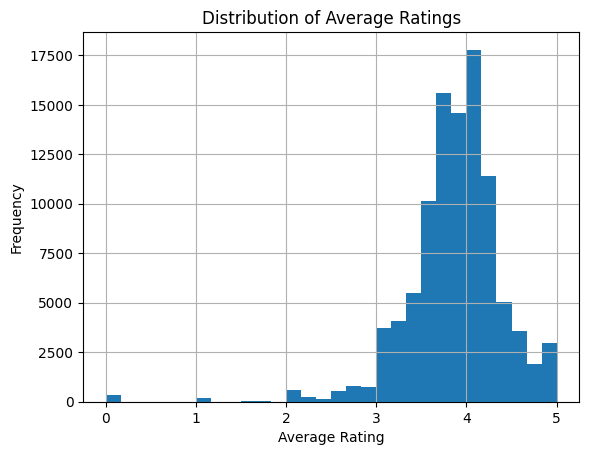

In [128]:
#average rating dist
books_joined_clean["average_rating"].hist(bins=30)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()


In [129]:
#imports that we might need to see publication patterens
import re
import numpy as np
from matplotlib.ticker import MultipleLocator

In [137]:

#function to force the graph to not start from zero 
def clean_publication_year(series, min_year=1880, max_year=2025):
    """
     -turn the data into whole numbers
     -then capture proper 4‑digit years from strings
     -drop anything that doesn’t look like a real year (invalid entries)
    """
    s = series.copy()
    s = pd.to_numeric(s, errors="coerce") #coerce numeric 

    # drop NaN and years that are not possible (the range is set by me)
    s = s.where((s >= min_year) & (s <= max_year))
    return s

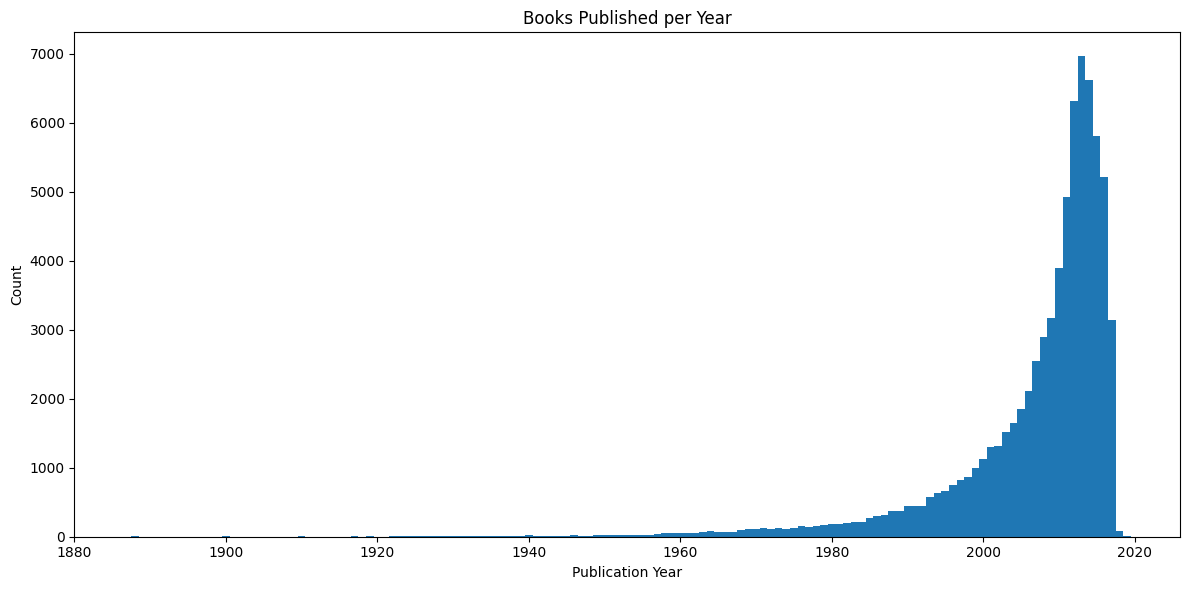

In [133]:
years_clean = clean_publication_year(books_joined_clean["publication_year"]) #clean publication years

# filter rows with valid years
valid = books_joined_clean.loc[years_clean.notna()].copy()
valid["publication_year"] = years_clean.loc[years_clean.notna()].astype(int) #type check

# count per year 
year_counts = valid["publication_year"].value_counts().sort_index()

# plot with matplotlib 
years = year_counts.index.to_numpy()
counts = year_counts.values

plt.figure(figsize=(12,6))
plt.bar(years, counts, width=1.0, align="center")

plt.title("Books Published per Year")
plt.xlabel("Publication Year")
plt.ylabel("Count")

# start at earliest valid year then stop at latest valid years
plt.xlim(left=int(years.min()) - 1, right=int(years.max()) + 1)

# make ticks readable => TO AVOID UNREABLE DISPLAY 
plt.gca().xaxis.set_major_locator(MultipleLocator(20))

plt.tight_layout()
plt.show()

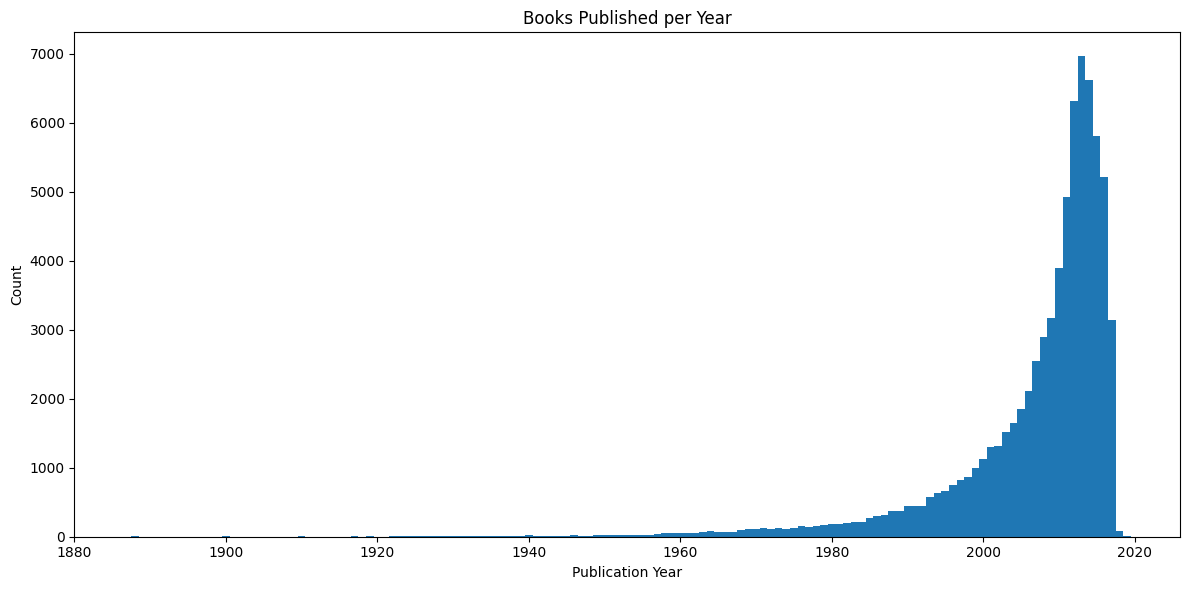

In [138]:
## adjust function so it min years is 1880 and run again 
years_clean = clean_publication_year(books_joined_clean["publication_year"]) #clean publication years

# filter rows with valid years
valid = books_joined_clean.loc[years_clean.notna()].copy()
valid["publication_year"] = years_clean.loc[years_clean.notna()].astype(int) #type check

# count per year 
year_counts = valid["publication_year"].value_counts().sort_index()

# plot with matplotlib 
years = year_counts.index.to_numpy()
counts = year_counts.values

plt.figure(figsize=(12,6))
plt.bar(years, counts, width=1.0, align="center")

plt.title("Books Published per Year")
plt.xlabel("Publication Year")
plt.ylabel("Count")

# start at earliest valid year , stop at latest valid years
plt.xlim(left=int(years.min()) - 1, right=int(years.max()) + 1)

# make ticks readable => TO AVOID UNREABLE DISPLAY 
plt.gca().xaxis.set_major_locator(MultipleLocator(20))

plt.tight_layout()
plt.show()

user_id
00009e46d18f223a82b22da38586b605    1
0000c3d51aa099745e93a4e99c4856c8    4
0003e1902a82d4587e333e4cbd6dfd92    1
0004ae25e3cf5f5a44b6f1ccfdd3d343    1
000545fd791e4252ed8408e9cdf1ea67    1
0005a08accd53b1e19c52109a1f478cb    2
0005f52944ea1992e95d61f287acaea9    4
0006036bb1aa0aed8f08cd65559fb193    1
0006260f85929db85eddee3a0bd0e504    3
0007f8dd09337afd986d765569cf0110    2
Name: book_id, dtype: int64


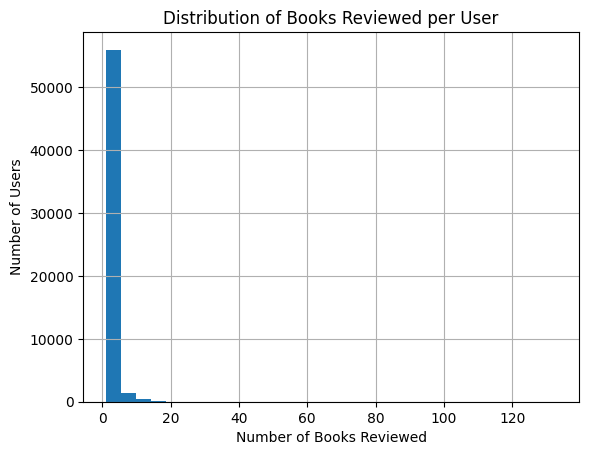

In [140]:
#not mapped but just to display pattern
books_reviewed_per_user = pickleDatasets["reviews"].groupby("user_id")["book_id"].nunique()

print(books_reviewed_per_user.head(10))  

books_reviewed_per_user.hist(bins=30)
plt.title("Distribution of Books Reviewed per User")
plt.xlabel("Number of Books Reviewed")
plt.ylabel("Number of Users")
plt.show()

In [142]:
# compute number of books read per user => take sample
books_read_per_user = pickleDatasets["user_interaction"].groupby("user_id_x")["is_read"].sum()

books_read_per_user.head(10)

user_id_x
3     0
5     0
9     1
10    0
14    0
20    1
33    1
38    1
54    1
68    1
Name: is_read, dtype: int64

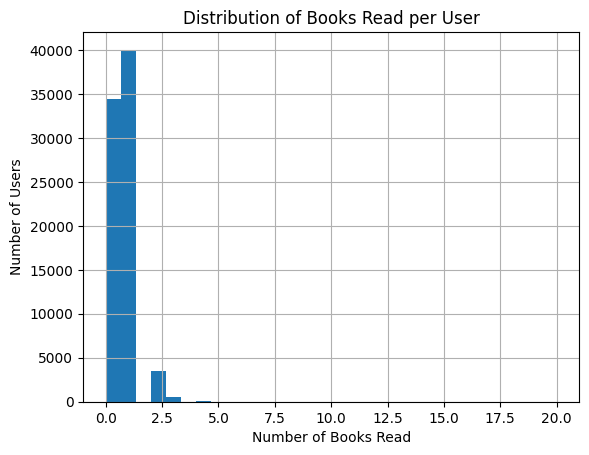

In [143]:
books_read_per_user.hist(bins=30)
plt.title("Distribution of Books Read per User")
plt.xlabel("Number of Books Read")
plt.ylabel("Number of Users")
plt.show()

In [144]:
# number of books reviewed (read) per user
books_reviewed_per_user = pickleDatasets["reviews"].groupby("user_id")["book_id"].nunique()

print(books_reviewed_per_user.head())

user_id
00009e46d18f223a82b22da38586b605    1
0000c3d51aa099745e93a4e99c4856c8    4
0003e1902a82d4587e333e4cbd6dfd92    1
0004ae25e3cf5f5a44b6f1ccfdd3d343    1
000545fd791e4252ed8408e9cdf1ea67    1
Name: book_id, dtype: int64


In [145]:
reviewsdisplay = pickleDatasets["reviews"]

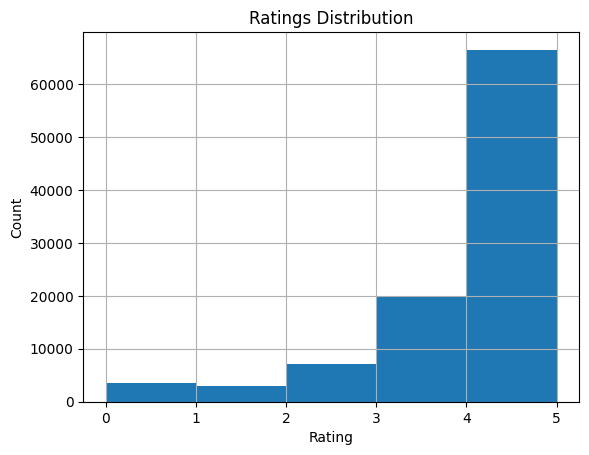

In [146]:
#rating distribution 
reviewsdisplay['rating'].hist(bins=5)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

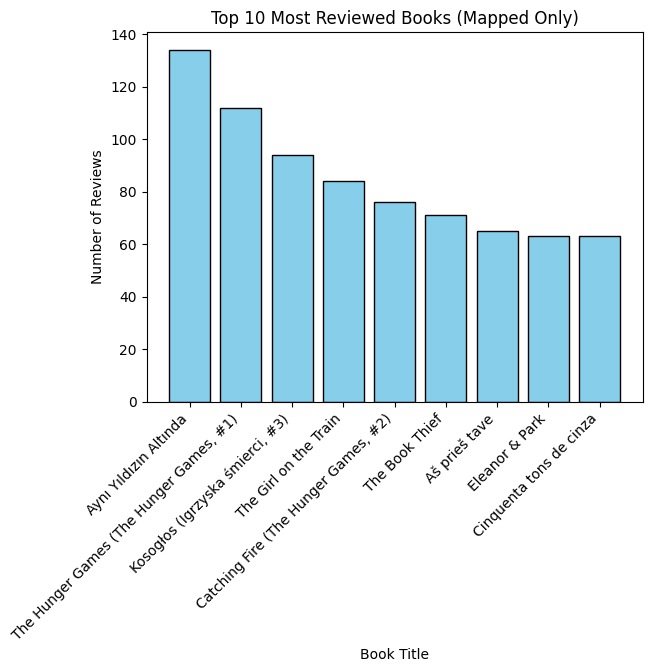

In [147]:
# we want to see the top reviewed books (that can be mapped)
top_books = reviewsdisplay["book_id"].value_counts().head(10)

# map id to title
id_to_title = books_joined_clean.set_index("best_book_id")["title"].to_dict()

# keep only mapped ids so we have titles in the graph
mapped_ids = [bid for bid in top_books.index if str(bid) in id_to_title]

# create lists for titles and counts
titles = [id_to_title[str(bid)] for bid in mapped_ids]
counts = [top_books[bid] for bid in mapped_ids]

# plot
plt.bar(titles, counts, color="skyblue", edgecolor="black")
plt.title("Top 10 Most Reviewed Books (Mapped Only)")
plt.xlabel("Book Title")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha="right")
plt.show()

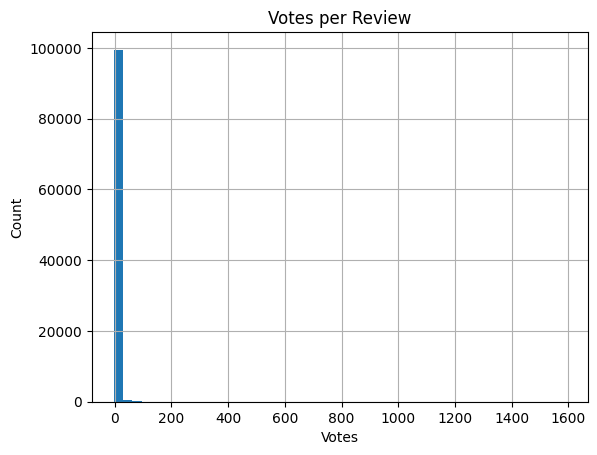

In [148]:
# votes per review
reviewsdisplay['n_votes'].hist(bins=50)
plt.title("Votes per Review")
plt.xlabel("Votes")
plt.ylabel("Count")
plt.show()

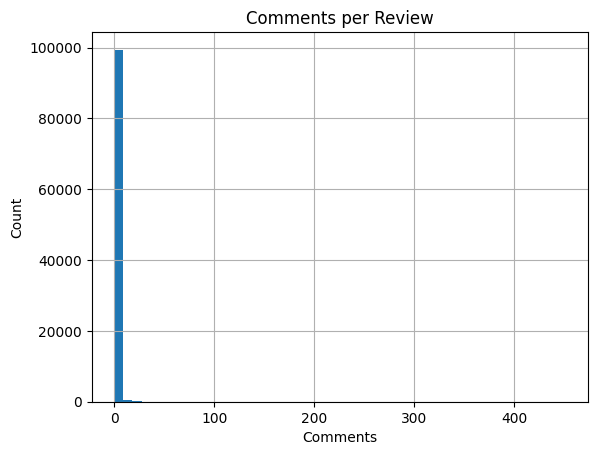

In [149]:
# comments per review
reviewsdisplay['n_comments'].hist(bins=50)
plt.title("Comments per Review")
plt.xlabel("Comments")
plt.ylabel("Count")
plt.show()

In [150]:
#user interaction 
user_interactiondisplay = pickleDatasets["user_interaction"]

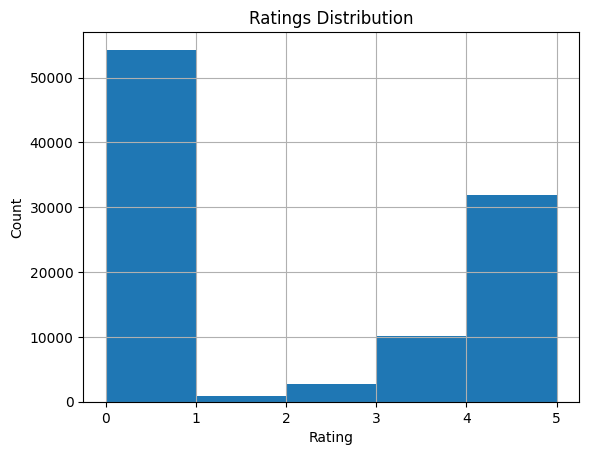

In [151]:
#rating distribution
user_interactiondisplay['rating'].hist(bins=5)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

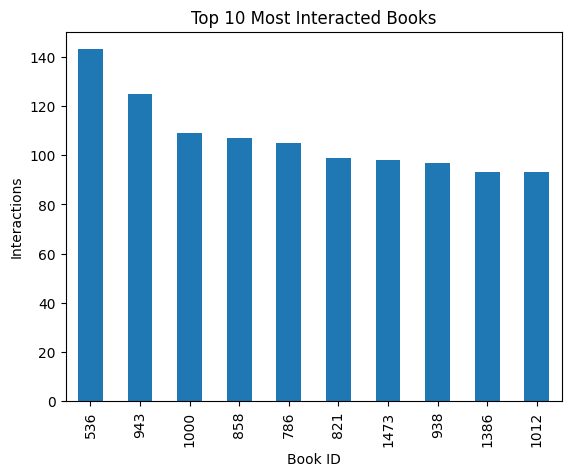

In [152]:
#user interaction most interacted with book
top_books = user_interactiondisplay['book_id_x'].value_counts().head(10)
top_books.plot(kind='bar')
plt.title("Top 10 Most Interacted Books")
plt.xlabel("Book ID")
plt.ylabel("Interactions")
plt.show()

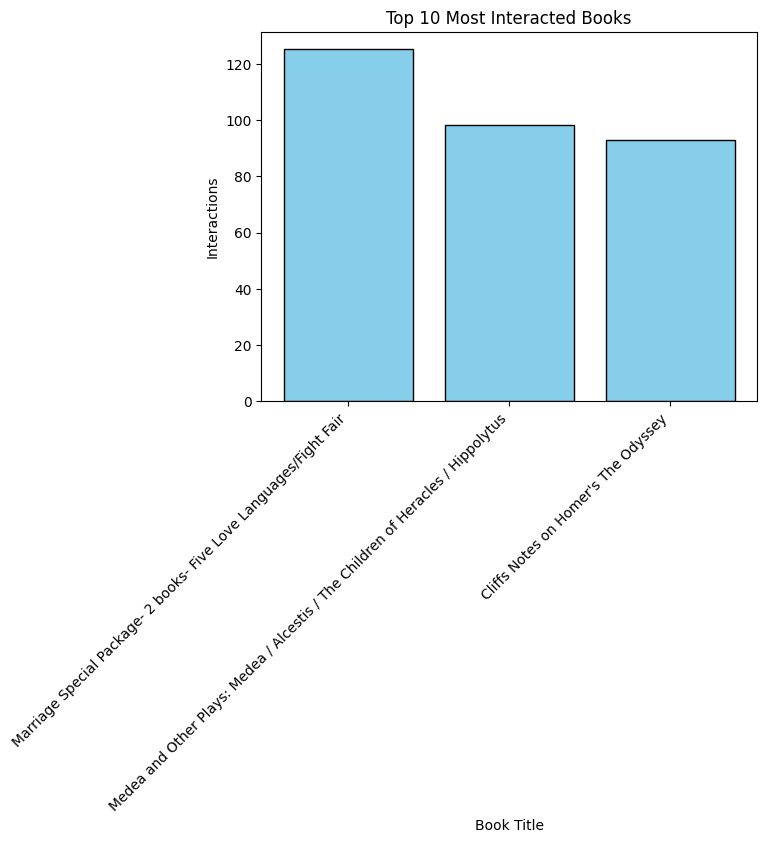

In [153]:
# top 10 most interacted-with books )(how many out of the top 10 are mapped)
top_books = user_interactiondisplay["book_id_x"].value_counts().head(10)

# mapping
id_to_title = books_joined_clean.set_index("book_id")["title"].to_dict()

# mapped ids only (only these are mapped)
mapped_ids = [bid for bid in top_books.index if str(bid) in id_to_title]
titles = [id_to_title[str(bid)] for bid in mapped_ids]
counts = [top_books[bid] for bid in mapped_ids]

# plot
plt.bar(titles, counts, color="skyblue", edgecolor="black")
plt.title("Top 10 Most Interacted Books")
plt.xlabel("Book Title")
plt.ylabel("Interactions")
plt.xticks(rotation=45, ha="right")
plt.show()


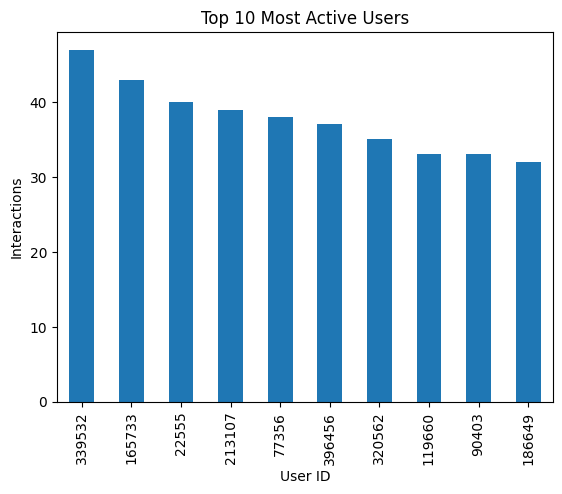

In [154]:

# top 10 most active users to see how man interactions we have max
top_users = user_interactiondisplay['user_id_x'].value_counts().head(10)
top_users.plot(kind='bar')
plt.title("Top 10 Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Interactions")
plt.show()


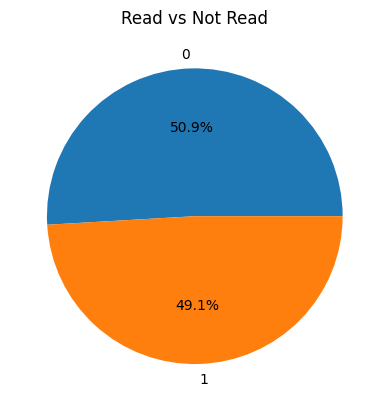

In [155]:
#interactions without reading adding to shelves  (0 not read and 1 read)
user_interactiondisplay['is_read'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Read vs Not Read")
plt.ylabel("")
plt.show()

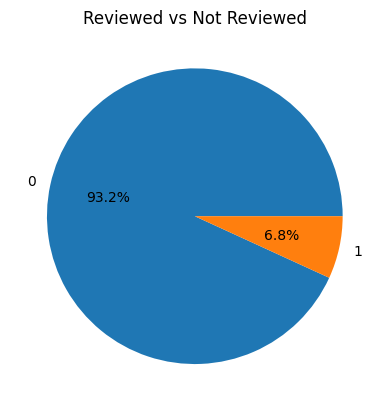

In [156]:
#reviewed or not (0 not reviewed and 1 reviewed)
user_interactiondisplay['is_reviewed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Reviewed vs Not Reviewed")
plt.ylabel("")
plt.show()

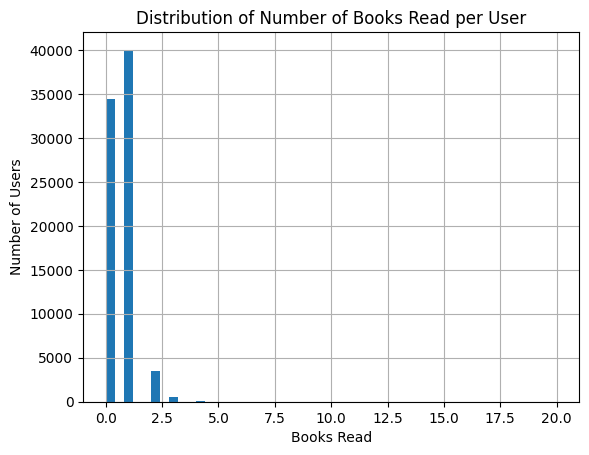

In [157]:
# books read per user (new)
books_read_per_user = user_interactiondisplay.groupby("user_id_x")["is_read"].sum()
books_read_per_user.hist(bins=50)
plt.title("Distribution of Number of Books Read per User")
plt.xlabel("Books Read")
plt.ylabel("Number of Users")
plt.show()

#### EDA SUMMARIES 

In [ ]:
#we notice from the last graphs that that most interactiong are reviews and rating related rather than reading 
#that is not because the users are not reading but rather that they log their reviews without inserting reading logs
#we also note that within the sample user rated less than 20 books.

In [158]:
# column names check 
print("Columns in reviews:", list(pickleDatasets['reviews'].columns))
print("Columns in user_id_map:", list(pickleDatasets['user_id_map'].columns))

Columns in reviews: ['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']
Columns in user_id_map: ['user_id_csv', 'user_id']


In [159]:
## remap reviews datasets to have unhashed id
# merge reviews with user_id_map
reviews_mapped = pickleDatasets['reviews'].merge(
    pickleDatasets['user_id_map'],
    how="left",
    left_on="user_id",   # hashed string in reviews
    right_on="user_id"   # hashed string in user_id_map
)


In [160]:
#the other reviews datasets
reviews_started_mapped = reviews_started_clean.merge(
    pickleDatasets['user_id_map'],
    how="left",
    left_on="user_id",   
    right_on="user_id"   
)

reviews_added_mapped = reviews_added_clean.merge(
    pickleDatasets['user_id_map'],
    how="left",
    left_on="user_id",   
    right_on="user_id"   
)

reviews_read_mapped = reviews_read_clean.merge(
    pickleDatasets['user_id_map'],
    how="left",
    left_on="user_id",   
    right_on="user_id"  
)

In [161]:
# show first few rows to confirm mapping
print("Preview of reviews_started_mapped:")
reviews_started_mapped.head()

Preview of reviews_started_mapped:


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,user_id_csv
0,8cbd2c89aa007bc2a0275c0b11a66bed,835817,f77ebeaa7c6a7fb85c59a73c118a09d3,5,"?Puedo darle 50 estrellas? ?Puedo, por favor? ...",2016-08-17 15:57:26-07:00,2016-09-02 17:54:46-07:00,2016-09-02 00:00:00-07:00,2016-08-17 00:00:00-07:00,29916
1,78bbebcc3c123e2be1758d3ce799510e,15790873,0911dec34527f404ca3d62243e8c4c55,3,3.5 stars \n Review later.,2015-09-04 03:07:48-07:00,2015-09-08 19:11:52-07:00,2015-09-08 00:00:00-07:00,2015-09-04 00:00:00-07:00,94763
2,96f6715475cac2516fe99183652be24c,17333223,f4d194bada345e30e334f34d95ac9471,5,One of the best stories! The beginning was exp...,NaT,NaT,2014-04-27 00:00:00-07:00,2014-04-21 00:00:00-07:00,441911
3,ea6081b3643e62e748c314c2dd84519f,23847945,c1f653ba3c071385acdc0fa70b6859db,3,Just OK. Longer review to come.,2015-10-29 01:16:26-07:00,NaT,NaT,2015-10-29 00:00:00-07:00,105213
4,30d5211247bad1fc9fc57995f85a681b,288830,7cc833f54a37c7b2dc25d394586240d5,4,A strange case indeed. And only 54 pages!,2012-07-16 08:07:28-07:00,NaT,2014-06-29 10:19:34-07:00,2014-06-23 00:00:00-07:00,413242


### note that more reduction will be done method by method 

In [148]:
#directory 
MAIN_PICKLE_DIR = os.path.join(DIR, "MainData")

os.makedirs(MAIN_PICKLE_DIR, exist_ok=True)  # create folder if not exists

# most important frequently used datasets with most relevent info
main_datasets = {}

# normal reviews
main_datasets["reviews"] = pickleDatasets["reviews"]


main_datasets["user_interaction"] = pickleDatasets["user_interaction"]

main_datasets["books_joined_clean"] = pickleDatasets["books_joined_clean"]

# all books (for genres)
for name, df in pickleDatasets.items():
    if name.startswith("books") and name != "books_joined_clean":
        main_datasets[name] = df

# all the cleaned reviews
main_datasets["reviews_started_clean"] = reviews_started_clean
main_datasets["reviews_added_clean"]   = reviews_added_clean
main_datasets["reviews_read_clean"]    = reviews_read_clean

main_datasets["reviews_started_mapped"] = reviews_started_mapped
main_datasets["reviews_added_mapped"]   = reviews_added_mapped
main_datasets["reviews_read_mapped"]    = reviews_read_mapped


# save
for name, df in main_datasets.items():
    df.to_pickle(os.path.join(MAIN_PICKLE_DIR, f"{name}.pkl"))
    print(f"{name} saved to MainData!")

reviews saved to MainData!
user_interaction saved to MainData!
books_joined_clean saved to MainData!
books saved to MainData!
books_children saved to MainData!
books_comics saved to MainData!
books_fantasy saved to MainData!
books_history saved to MainData!
books_mystery saved to MainData!
books_poetry saved to MainData!
books_romance saved to MainData!
books_young_adult saved to MainData!
reviews_started_clean saved to MainData!
reviews_added_clean saved to MainData!
reviews_read_clean saved to MainData!
reviews_started_mapped saved to MainData!
reviews_added_mapped saved to MainData!
reviews_read_mapped saved to MainData!
